In [87]:
import glob
import pickle
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 14})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 14}

import warnings
warnings.filterwarnings('ignore')

In [88]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


## Show which scenarios have available (processed) forcing

All decades in all scenarios where forcing is present for full decade have been processed

Text(0.5, 1.0, 'Availability of met office processed wind forcing \n for 6 scenarios')

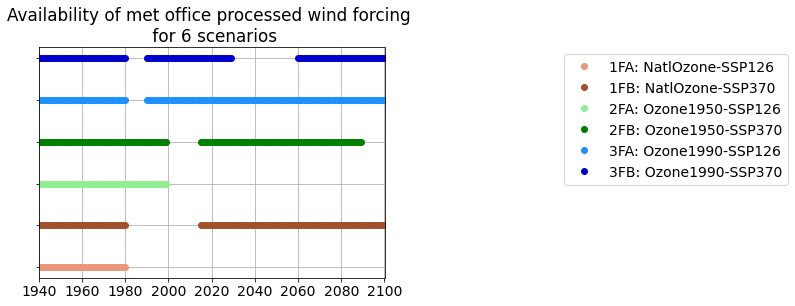

In [96]:
arange = np.arange(1940,2101,1)

ind_1A = np.zeros_like(arange)
ind_1B = np.zeros_like(arange)
ind_2A = np.zeros_like(arange)
ind_2B = np.zeros_like(arange)
ind_3A = np.zeros_like(arange)
ind_3B = np.zeros_like(arange)

ind_1A = ind_1A.astype(float)
ind_1B = ind_1B.astype(float)
ind_2A = ind_2A.astype(float)
ind_2B = ind_2B.astype(float)
ind_3A = ind_3A.astype(float)
ind_3B = ind_3B.astype(float)

typ = 22 
yr = 1940


for i in range(0,len(arange)):
    yr = arange[i]
    if yr < 2015: tdir = dir_1H
    if yr >= 2015: tdir = dir_1FA
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_1A[i] = 1
        
    if yr < 2015: tdir = dir_1H
    if yr >= 2015: tdir = dir_1FB
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_1B[i] = 1.5
        
    if yr < 2015: tdir = dir_2H
    if yr >= 2015: tdir = dir_2FA
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_2A[i] = 2
        
    if yr < 2015: tdir = dir_2H
    if yr >= 2015: tdir = dir_2FB
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_2B[i] = 2.5
        
    if yr < 2015: tdir = dir_3H
    if yr >= 2015: tdir = dir_3FA
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_3A[i] = 3
        
    if yr < 2015: tdir = dir_3H
    if yr >= 2015: tdir = dir_3FB
    fnam = f'bulk_{yr}_{typ}_met_daily.nc'
    w = glob.glob(f'{rdir}{tdir}{fnam}')
    if len(w) > 0:
        ind_3B[i] = 3.5

ind_1A[ind_1A < 1] = np.nan
ind_1B[ind_1B < 1] = np.nan
ind_2A[ind_2A < 1] = np.nan
ind_2B[ind_2B < 1] = np.nan
ind_3A[ind_3A < 1] = np.nan
ind_3B[ind_3B < 1] = np.nan

# ozone evolution to 1990 in 3A, 3B is the same as in 1A, 1B
ind_3A[(arange < 1990) & (ind_1A > 0)] = 3
ind_3B[(arange < 1990) & (ind_1A > 0)] = 3.5
ind_2A[(arange < 1950) & (ind_1A > 0)] = 2
ind_2B[(arange < 1950) & (ind_1A > 0)] = 2.5

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
plt.plot(arange,ind_1A,marker = 'o',linestyle = '', color = col_1A, label = name_1FA)
plt.plot(arange,ind_1B,marker = 'o',linestyle = '',  color = col_1B, label = name_1FB)
plt.plot(arange,ind_2A,marker = 'o',linestyle = '', color = col_2A, label = name_2FA)
plt.plot(arange,ind_2B,marker = 'o',linestyle = '',  color = col_2B, label = name_2FB)
plt.plot(arange,ind_3A,marker = 'o',linestyle = '', color = col_3A, label = name_3FA)
plt.plot(arange,ind_3B,marker = 'o',linestyle = '',  color = col_3B, label = name_3FB)
ax.set_yticklabels([])
ax.grid()
ax.set_xlim([1940,2100])
plt.legend(bbox_to_anchor = [1.5,1])
plt.title(f'Availability of met office processed wind forcing \n for 6 scenarios')

In [89]:
#root directory, where to find Met office files
rdir = '/gpfs/home/mep22dku/scratch/MET_soft/'
dir_1H = 'hist/u-bc370_hist/'
dir_2H = 'hist/u-cj198_hist_1950start1950ozone/'
dir_3H = 'hist/u-cj200_hist_1990start1990ozone/'

dir_1FA = 'ssp126/u-be682_ssp126/'
dir_1FB = 'ssp370/u-ce417_ssp370/'

dir_2FA = 'ssp126/u-cj880_ssp126_1950start1950ozone/'
dir_2FB = 'ssp370/u-cj881_ssp370_1950start1950ozone/'

dir_3FA = 'ssp126/u-cj484_ssp126_1990start1990ozone/'
dir_3FB = 'ssp370/u-cj504_ssp370_1990start1990ozone/'

name_1H = '1H: NatlOzone-historical'
name_2H = '2H: Ozone1950-historical'
name_3H = '3H: Ozone1990-historical'
name_1FA = '1FA: NatlOzone-SSP126'
name_1FB = '1FB: NatlOzone-SSP370'
name_2FA = '2FA: Ozone1950-SSP126'
name_2FB = '2FB: Ozone1950-SSP370'
name_3FA = '3FA: Ozone1990-SSP126'
name_3FB = '3FB: Ozone1990-SSP370'

name_1A = '1A: NatlOzone-SSP126'
name_1B = '1B: NatlOzone-SSP370'
name_2A = '2A: Ozone1950-SSP126'
name_2B = '2B: Ozone1950-SSP370'
name_3A = '3A: Ozone1990-SSP126'
name_3B = '3B: Ozone1990-SSP370'

col_1A = 'darksalmon'; col_1B = 'sienna'
col_2A = 'lightgreen'; col_2B = 'g'
col_3A = 'dodgerblue'; col_3B = 'mediumblue'

exp_1H = 'bc370'; exp_2H = 'cj198'; exp_3H = 'cj200'
exp_1FA = 'be682'; exp_1FB = 'ce417'
exp_2FA = 'cj880'; exp_2FB = 'cj881'
exp_3FA = 'cj484'; exp_3FB = 'cj504'



In [90]:
scen_1A = np.zeros([161,12,3])
scen_1B = np.zeros([161,12,3])
scen_2A = np.zeros([161,12,3])
scen_2B = np.zeros([161,12,3])
scen_3A = np.zeros([161,12,3])
scen_3B = np.zeros([161,12,3])

In [91]:
scen = 'scen_1H'; yrstart = 1940; yrend = 2015
scen_1H_stor = pickle.load(open(f'./pkls/{scen}_wspd_{yrstart}_{yrend}.pkl','rb'))
scen = 'scen_1FA'; yrstart = 2015; yrend = 2101
scen_1FA_stor = pickle.load(open(f'./pkls/{scen}_wspd_{yrstart}_{yrend}.pkl','rb'))
scen = 'scen_1FB'; 
scen_1FB_stor = pickle.load(open(f'./pkls/{scen}_wspd_{yrstart}_{yrend}.pkl','rb'))

scen = 'scen_2H'; yrstart = 1950; yrend = 2015
scen_2H_stor = pickle.load(open(f'./pkls/{scen}_wspd_{yrstart}_{yrend}.pkl','rb'))
scen = 'scen_2FA'; yrstart = 2015; yrend = 2101
scen_2FA_stor = pickle.load(open(f'./pkls/{scen}_wspd_{yrstart}_{yrend}.pkl','rb'))
scen = 'scen_2FB'; 
scen_2FB_stor = pickle.load(open(f'./pkls/{scen}_wspd_{yrstart}_{yrend}.pkl','rb'))

scen = 'scen_3H'; yrstart = 1990; yrend = 2015
scen_3H_stor = pickle.load(open(f'./pkls/{scen}_wspd_{yrstart}_{yrend}.pkl','rb'))
scen = 'scen_3FA'; yrstart = 2015; yrend = 2101
scen_3FA_stor = pickle.load(open(f'./pkls/{scen}_wspd_{yrstart}_{yrend}.pkl','rb'))
scen = 'scen_3FB'; 
scen_3FB_stor = pickle.load(open(f'./pkls/{scen}_wspd_{yrstart}_{yrend}.pkl','rb'))

In [92]:
scen_1A[0:75,:,:] = scen_1H_stor;
scen_1A[75:161,:,:] = scen_1FA_stor;
scen_1B[0:75,:,:] = scen_1H_stor;
scen_1B[75:161,:,:] = scen_1FB_stor;
##
#first 10 years follow 1H
scen_2A[0:10,:,:] = scen_1H_stor[0:10,:,:];
scen_2A[10:75,:,:] = scen_2H_stor;
scen_2A[75:161,:,:] = scen_2FA_stor;
scen_2B[0:10,:,:] = scen_1H_stor[0:10,:,:];
scen_2B[10:75,:,:] = scen_2H_stor;
scen_2B[75:161,:,:] = scen_2FB_stor;
#first 50 years follow 1H
scen_3A[0:50,:,:] = scen_1H_stor[0:50,:,:];
scen_3A[50:75,:,:] = scen_3H_stor;
scen_3A[75:161,:,:] = scen_3FA_stor;
scen_3B[0:50,:,:] = scen_1H_stor[0:50,:,:];
scen_3B[50:75,:,:] = scen_3H_stor;
scen_3B[75:161,:,:] = scen_3FB_stor;

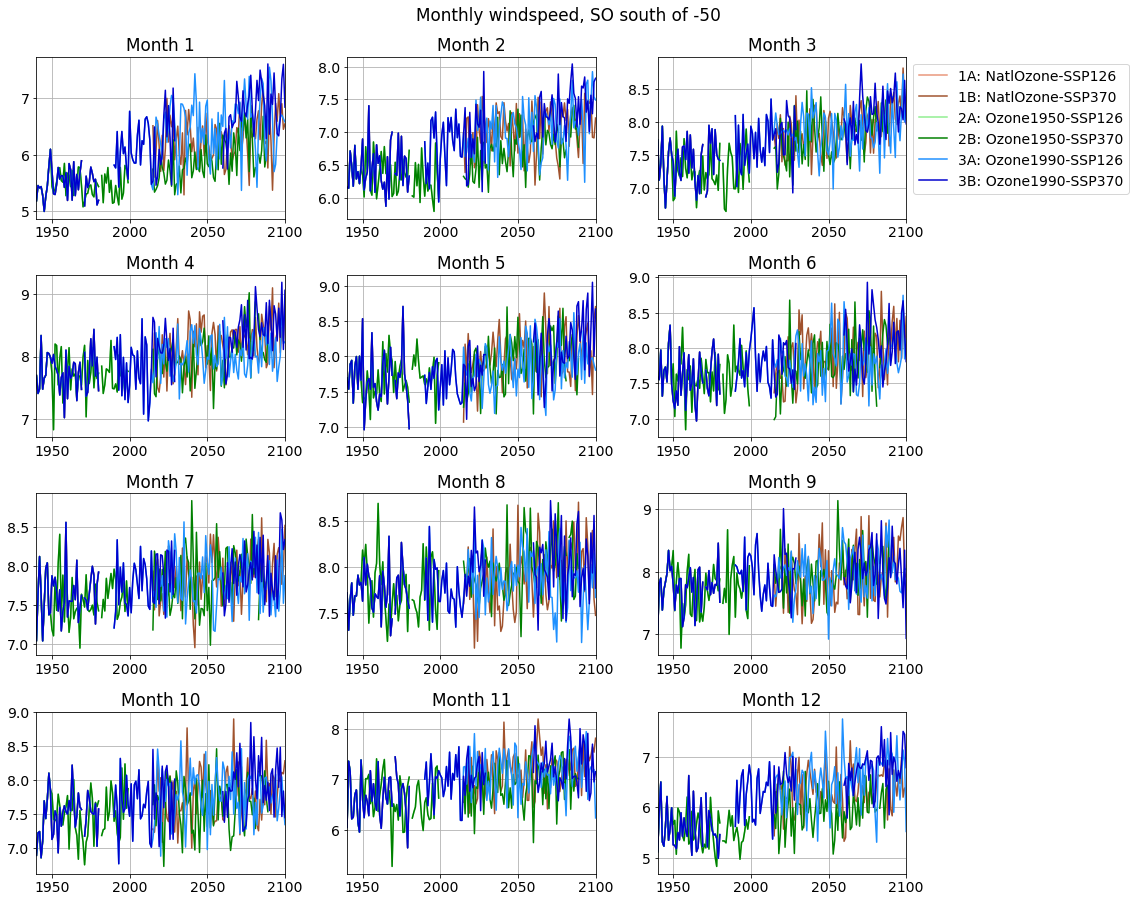

In [93]:
fact = 0.8
fig, axs = plt.subplots(4,3, figsize=(20*fact, 16*fact), \
                        facecolor='w', edgecolor='k')

scens = [scen_1A, scen_1B, scen_2A, scen_2B, scen_3A, scen_3B]
cols = [col_1A, col_1B, col_2A, col_2B, col_3A, col_3B]
names = [name_1A, name_1B, name_2A, name_2B, name_3A, name_3B]
yrs = np.arange(1940,2101,1)
axs = axs.ravel()
for s in range(0,6):
    scen = scens[s]; tcol = cols[s]; tnam = names[s]
    for i in range(0,12):
        axs[i].plot(yrs,scen[:,i,0], color = tcol, label = tnam)

for i in range(0,12):
    axs[i].set_xlim([1940,2100])
    axs[i].grid()
    axs[i].set_title(f'Month {i+1}')
axs[2].legend(bbox_to_anchor = [1, 1], loc = 'best')
plt.suptitle('Monthly windspeed, SO south of -50') 
plt.tight_layout()



In [94]:
scen_1A_10yr = np.zeros([16,12,3]); scen_1A_10yr[:] = np.nan
scen_1B_10yr = np.zeros([16,12,3]); scen_1B_10yr[:] = np.nan
scen_2A_10yr = np.zeros([16,12,3]); scen_2A_10yr[:] = np.nan
scen_2B_10yr = np.zeros([16,12,3]); scen_2B_10yr[:] = np.nan
scen_3A_10yr = np.zeros([16,12,3]); scen_3A_10yr[:] = np.nan
scen_3B_10yr = np.zeros([16,12,3]); scen_3B_10yr[:] = np.nan

start = 0; end = 10

for i in range(0,16):
   
    scen_1A_10yr[i,:,:] = np.nanmean(scen_1A[i*10:(i+1)*10,:,:],axis = 0)
    scen_1B_10yr[i,:,:] = np.nanmean(scen_1B[i*10:(i+1)*10,:,:],axis = 0)
    scen_2A_10yr[i,:,:] = np.nanmean(scen_2A[i*10:(i+1)*10,:,:],axis = 0)
    scen_2B_10yr[i,:,:] = np.nanmean(scen_2B[i*10:(i+1)*10,:,:],axis = 0)    
    scen_3A_10yr[i,:,:] = np.nanmean(scen_3A[i*10:(i+1)*10,:,:],axis = 0)
    scen_3B_10yr[i,:,:] = np.nanmean(scen_3B[i*10:(i+1)*10,:,:],axis = 0)
    
    start = start+10; end = end+10



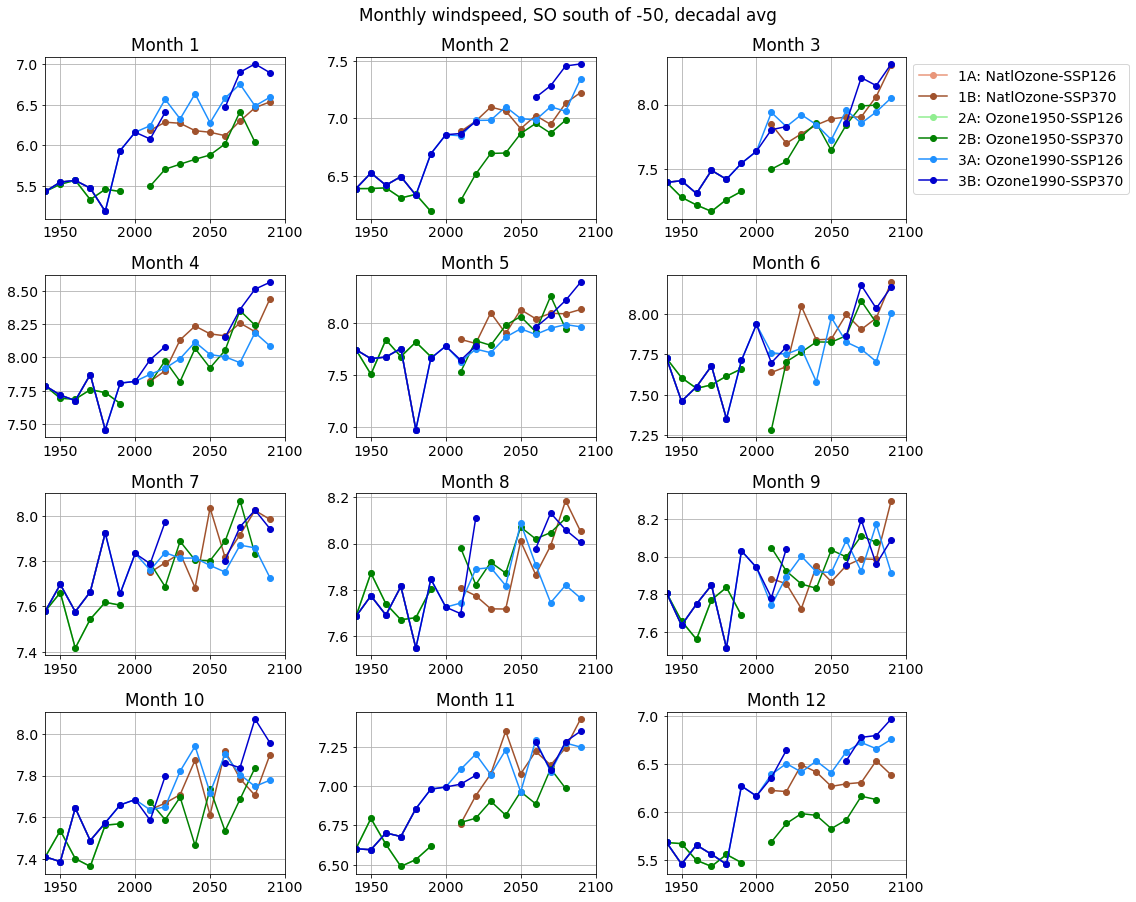

In [95]:
fact = 0.8
fig, axs = plt.subplots(4,3, figsize=(20*fact, 16*fact), \
                        facecolor='w', edgecolor='k')

scens = [scen_1A_10yr, scen_1B_10yr, scen_2A_10yr, \
         scen_2B_10yr, scen_3A_10yr, scen_3B_10yr]
cols = [col_1A, col_1B, col_2A, col_2B, col_3A, col_3B]
names = [name_1A, name_1B, name_2A, name_2B, name_3A, name_3B]
yrs = np.arange(1940,2100,10)
axs = axs.ravel()
for s in range(0,6):
    scen = scens[s]; tcol = cols[s]; tnam = names[s]
    for i in range(0,12):
        axs[i].plot(yrs,scen[:,i,0], marker = 'o', color = tcol, label = tnam)

for i in range(0,12):
    axs[i].set_xlim([1940,2100])
    axs[i].grid()
    axs[i].set_title(f'Month {i+1}')
axs[2].legend(bbox_to_anchor = [1, 1], loc = 'best')
plt.suptitle('Monthly windspeed, SO south of -50, decadal avg')
plt.tight_layout()

